In [1]:
%pylab notebook
import cetbtools.inspector as ci
from netCDF4 import Dataset
import numpy as np
import os

/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd /Users/brodzik/projects/PMESDR/mjbworking/AMSRE/eos_article_image/
%ls

/Users/brodzik/projects/PMESDR/mjbworking/AMSRE/eos_article_image
AMSRE_N_2003180/                PMESDRv0.1_AMSRE_N_2003181.tar
AMSRE_N_2003181/                PMESDRv0.1_AMSRE_N_2003182.tar
AMSRE_N_2003182/                PMESDRv0.1_AMSRE_N_2003183.tar
AMSRE_N_2003183/                PMESDRv0.1_AMSRE_N_2003184.tar
AMSRE_N_2003184/                PMESDRv0.1_AMSRE_N_2003185.tar
AMSRE_N_2003185/                PMESDRv0.1_AMSRE_N_2003186.tar
AMSRE_N_2003186/                PMESDRv0.1_AMSRE_N_2003187.tar
AMSRE_N_2003187/                PMESDRv0.1_AMSRE_N_2003188.tar
AMSRE_N_2003188/                PMESDRv0.1_AMSRE_N_2003189.tar
AMSRE_N_2003189/                PMESDRv0.1_AMSRE_S_2003180.tar
AMSRE_S_2003180/                PMESDRv0.1_AMSRE_S_2003181.tar
AMSRE_S_2003181/                PMESDRv0.1_AMSRE_S_2003182.tar
AMSRE_S_2003182/                PMESDRv0.1_AMSRE_S_2003183.tar
AMSRE_S_2003183/                PMESDRv0.1_AMSRE_S_2003184.tar
AMSRE_S_2003184/                PMESDRv0.1_AMSRE_S_2

In [3]:
def get_avg_tb(files):
    
    # open each file in turn and add to the sum array
    for num, file in enumerate(files):
        f = Dataset(file, 'r', 'NETCDF4')
        tb = np.squeeze(f.variables[ 'TB' ][ : ])
        if num == 0:
            tb_sum = np.zeros(tb.shape)
            count = np.zeros(tb.shape)
            
        tb_sum = tb_sum + tb.data
        count[tb.data > 0] = count[tb.data > 0] + 1
        print("num=%d, min=%f, max=%f" % (num, np.amin(tb_sum), np.amax(tb_sum)))
        f.close()
    
    # Divide sum array by count, be careful not to divide by zero
    count[count < 1.] = 1.
    tb_sum = tb_sum / count
    return(tb_sum)

In [37]:
doys = [180, 181]
#proj = 'N'
#direction = 'D'
#xdim = 12
#ydim = 12
proj = 'T'
direction = 'D'
xdim = 24
ydim = 8

In [35]:
filenames = ["AMSRE_%s_2003%03d/EASE2_%s3.125km.AQUA_AMSRE.2003%03d.36H.%s.SIR.RSS.v0.1.nc" % (proj, doy, proj, doy, direction) for doy in doys]
filenames

['AMSRE_T_2003180/EASE2_T3.125km.AQUA_AMSRE.2003180.36H.D.SIR.RSS.v0.1.nc',
 'AMSRE_T_2003181/EASE2_T3.125km.AQUA_AMSRE.2003181.36H.D.SIR.RSS.v0.1.nc']

In [36]:
avg_tb = get_avg_tb(filenames)
avg_tb.shape, np.amin(avg_tb), np.amax(avg_tb)

num=0, min=0.000000, max=310.269989
num=1, min=0.000000, max=601.429993


((4320, 11104), 0.0, 310.32998657226562)

<IPython.core.display.Javascript object>


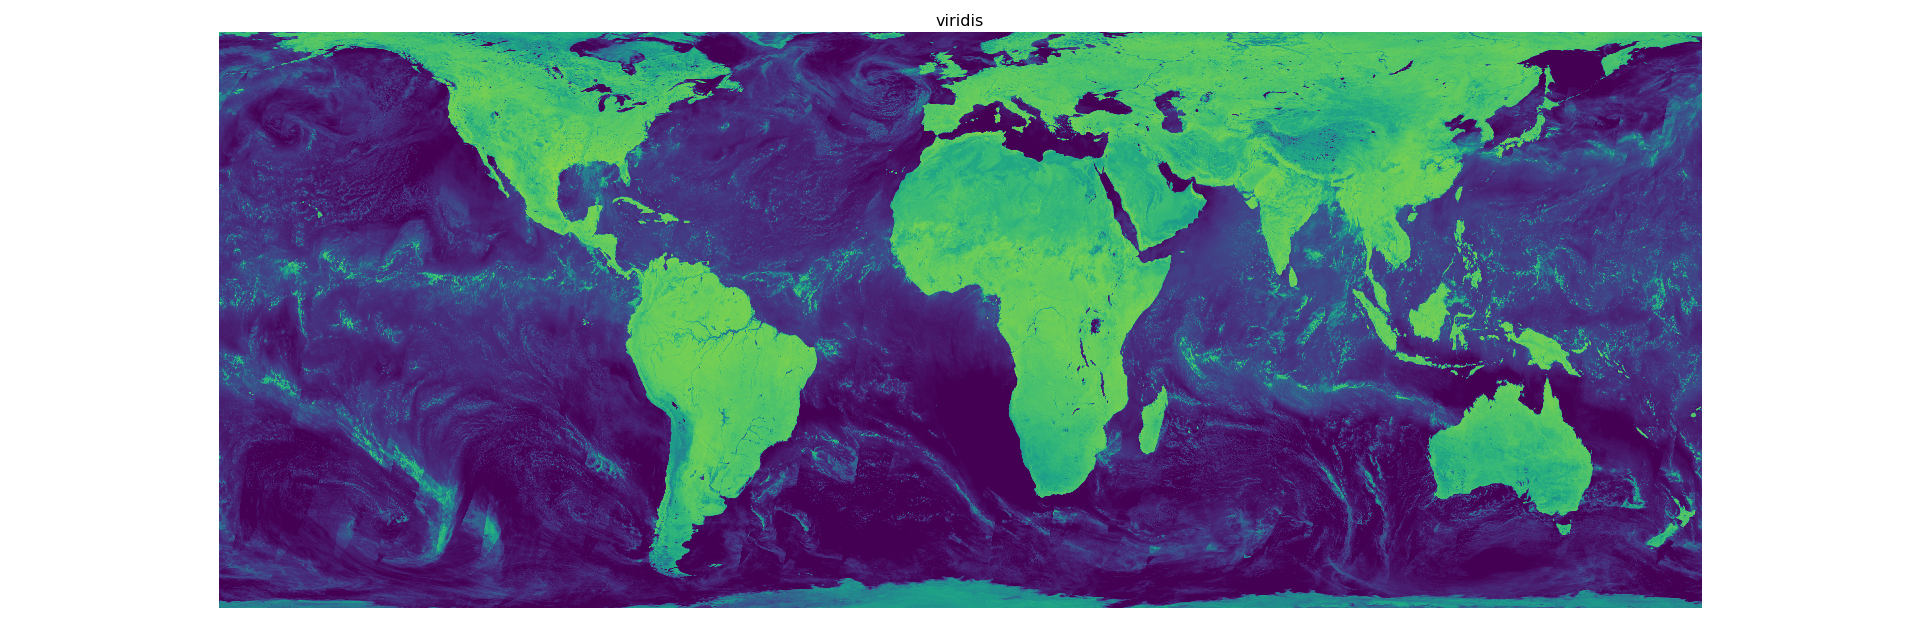

In [38]:
fig, ax = plt.subplots(1, figsize=(xdim, ydim))
ax.set_title("viridis")
ax.imshow(avg_tb, cmap="viridis", vmin=140., vmax=320, interpolation='nearest')
ax.axis('off')
plt.tight_layout()


In [39]:
#import matplotlib as mpl
#mpl.rcParams

In [40]:
plt.savefig("%s.2003180-181.36H.%s.png" % (proj, direction), dpi=600)

In [28]:
600*12

7200

In [23]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Arguments:
    
      *fname*:
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember to specify *format* to
        ensur

In [ ]:
arr[1,1] = 12.
arr

In [ ]:
new[arr > 0] = new[arr > 0] + 1
new

In [ ]:
tb.shape

In [ ]:
tb[2880,:].data

In [ ]:
new

In [ ]:
my_copy

In [ ]:
other_copy = new.copy()

In [ ]:
new

In [ ]:
other_copy

In [ ]:
other_copy[1,1] = 6.

In [ ]:
new

In [ ]:
other_copy

In [ ]:
other_copy = other_copy + new
other_copy

In [ ]:
arr

In [ ]:
arr[arr < 1.] = 1.
arr

In [ ]:
other_copy

In [ ]:
other_copy / arr